# SGR 1806-20 Giant Flare Shenanigans

Let's play around with the RHESSI light curve of the SGR 1806-20 giant flare from 2004.
I have the light curve in 4 different energy bands. One interesting question is whether there is a periodic signal in all energy bands.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
datadir = "/Users/danielahuppenkothen/work/data/sgr1820/giantflare/"

In [4]:
time1 = np.loadtxt(datadir+"bins_1.dat")
counts1 = np.loadtxt(datadir+"cnts_1.dat")

time2 = np.loadtxt(datadir+"bins_2.dat")
counts2 = np.loadtxt(datadir+"cnts_2.dat")

time3 = np.loadtxt(datadir+"bins_3.dat")
counts3 = np.loadtxt(datadir+"cnts_3.dat")

time4 = np.loadtxt(datadir+"bins_4.dat")
counts4 = np.loadtxt(datadir+"cnts_4.dat")

Ok, cool. Now that we've got the data, let's make a light curve of each and plot:

In [5]:
from stingray import Lightcurve, Powerspectrum

In [7]:
lc1 = Lightcurve(time1, counts1)
lc2 = Lightcurve(time2, counts2)
lc3 = Lightcurve(time3, counts3)
lc4 = Lightcurve(time4, counts4)

<IPython.core.display.Javascript object>


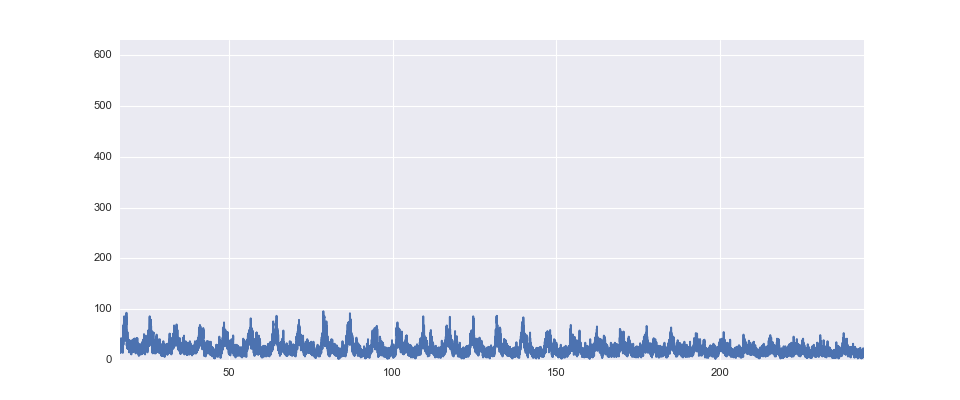

<IPython.core.display.Javascript object>


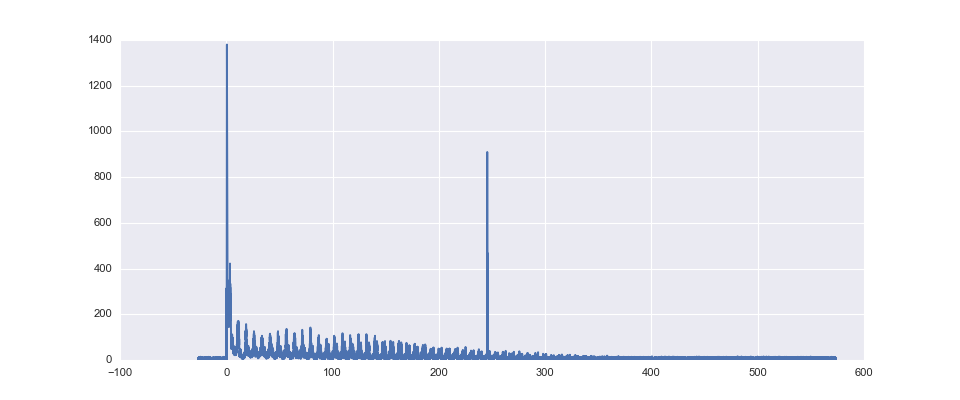

<IPython.core.display.Javascript object>


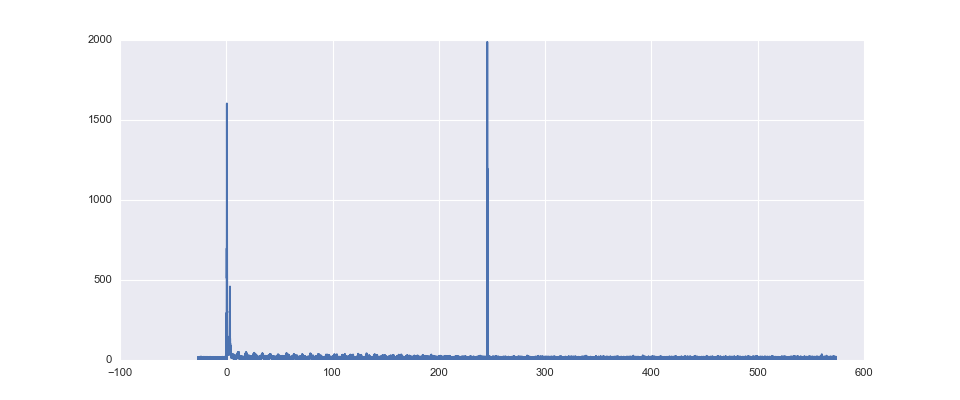

<IPython.core.display.Javascript object>


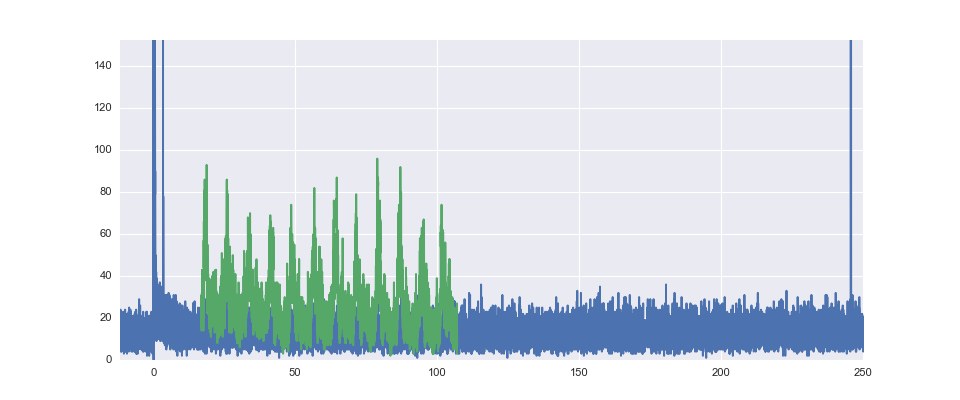

In [9]:
plt.figure(figsize=(12,5))
plt.plot(lc1.time, lc1.counts)

plt.figure(figsize=(12,5))
plt.plot(lc2.time, lc2.counts)

plt.figure(figsize=(12,5))
plt.plot(lc3.time, lc3.counts)

plt.figure(figsize=(12,5))
plt.plot(lc4.time, lc4.counts)

We're going to cut out the first sharp peak and everything after about 100 seconds:

In [10]:
print(time1)
print(time2)

[ -26.63883652  -26.62883652  -26.61883652 ...,  573.44116348  573.45116348
  573.46116348]
[ -26.63675655  -26.62675655  -26.61675655 ...,  573.43324345  573.44324345
  573.45324345]


In [11]:
tstart = 17.0
tend = tstart + 90.0

start_ind = time1.searchsorted(tstart)
end_ind = time1.searchsorted(tend)

In [15]:
lc1 = lc1.truncate(start_ind, end_ind, method="index")
lc2 = lc2.truncate(start_ind, end_ind, method="index")
lc3 = lc3.truncate(start_ind, end_ind, method="index")
lc4 = lc4.truncate(start_ind, end_ind, method="index")

<IPython.core.display.Javascript object>


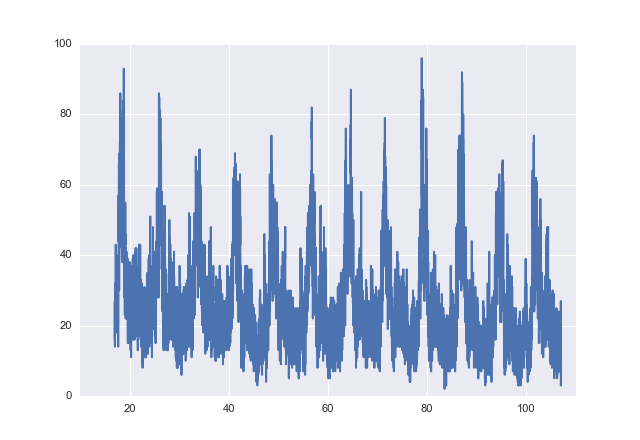

In [17]:
plt.figure()
plt.plot(lc1.time, lc1.counts)

Okay, cool. Let's have a look at the PSD:

In [18]:
ps1 = Powerspectrum(lc1, norm="leahy")
ps2 = Powerspectrum(lc2, norm="leahy")
ps3 = Powerspectrum(lc3, norm="leahy")
ps4 = Powerspectrum(lc4, norm="leahy")

<IPython.core.display.Javascript object>


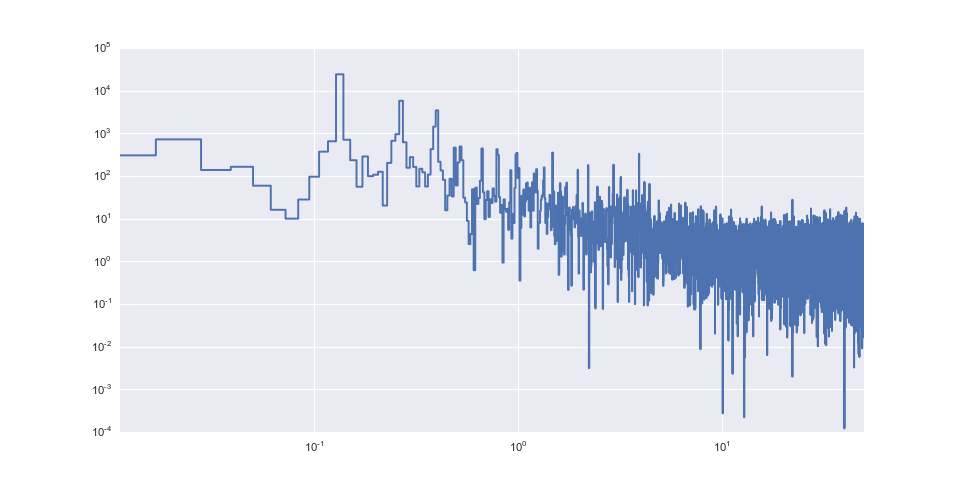

<IPython.core.display.Javascript object>


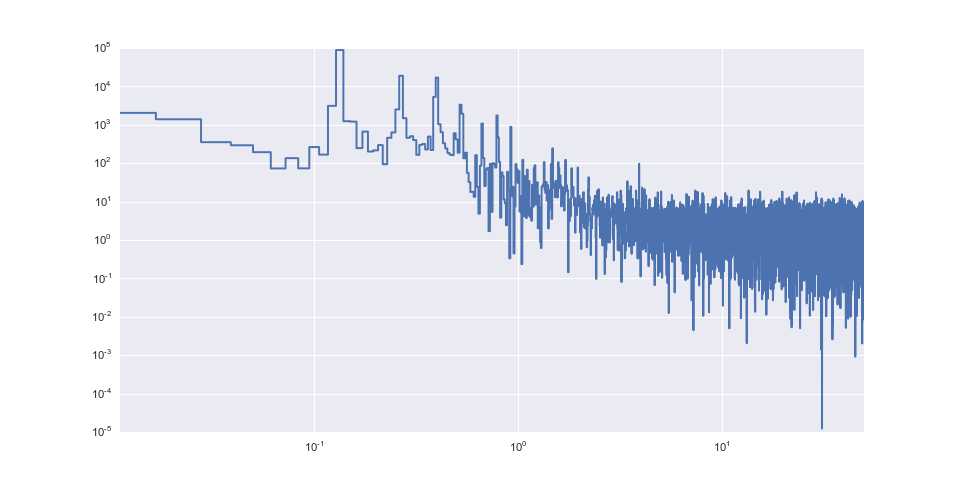

<IPython.core.display.Javascript object>


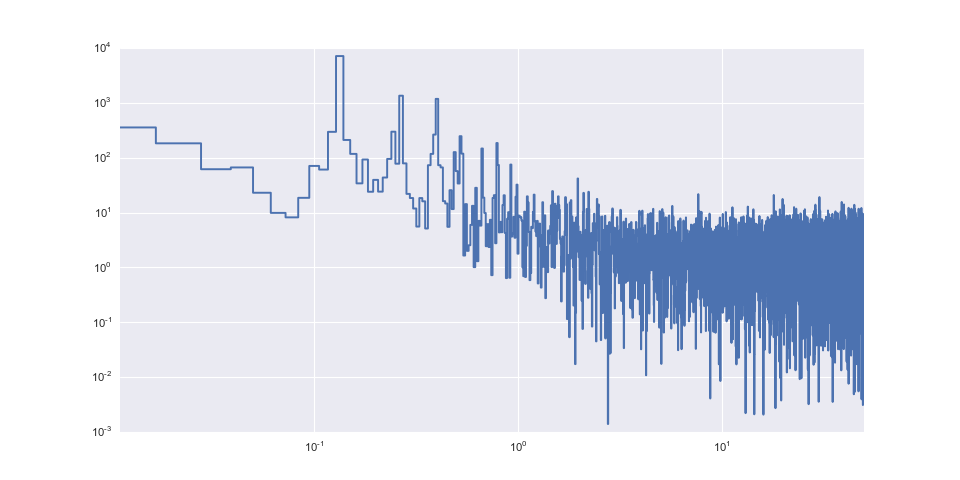

<IPython.core.display.Javascript object>


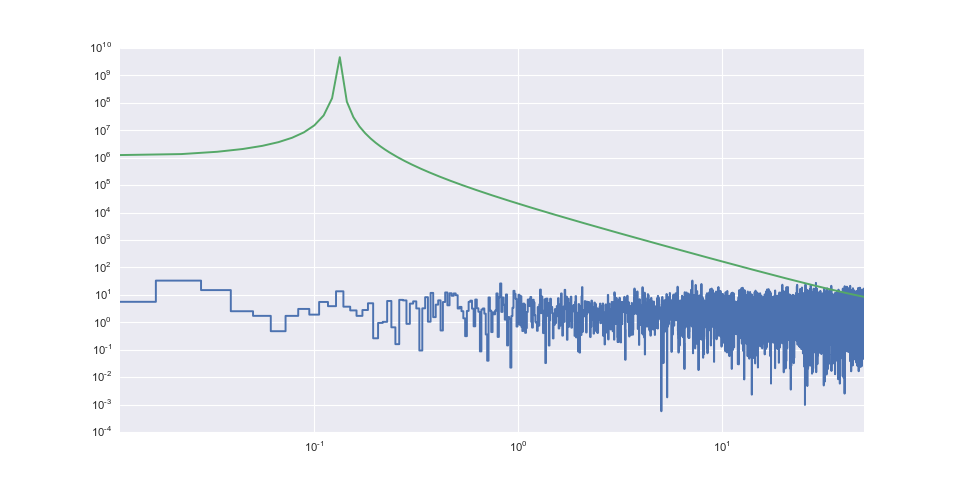

(0.011111111111113322, 49.988888888898835)

In [20]:
plt.figure(figsize=(12,6))
plt.loglog(ps1.freq, ps1.power, linestyle="steps-mid")
plt.xlim(ps1.freq[0], ps1.freq[-1])

plt.figure(figsize=(12,6))
plt.loglog(ps2.freq, ps2.power, linestyle="steps-mid")
plt.xlim(ps2.freq[0], ps2.freq[-1])

plt.figure(figsize=(12,6))
plt.loglog(ps3.freq, ps3.power, linestyle="steps-mid")
plt.xlim(ps3.freq[0], ps3.freq[-1])

plt.figure(figsize=(12,6))
plt.loglog(ps4.freq, ps4.power, linestyle="steps-mid")
plt.xlim(ps4.freq[0], ps4.freq[-1])

Okay, let's rebin the light curves to something coarser:

In [28]:
lc1_bin = lc1.rebin_lightcurve(0.1, method="sum")
lc2_bin = lc2.rebin_lightcurve(0.1, method="sum")
lc3_bin = lc3.rebin_lightcurve(0.1, method="sum")
lc4_bin = lc4.rebin_lightcurve(0.1, method="sum")

print("mean counts per bin: " + str(np.mean(lc1_bin.counts)))
print("mean counts per bin: " + str(np.mean(lc2_bin.counts)))
print("mean counts per bin: " + str(np.mean(lc3_bin.counts)))
print("mean counts per bin: " + str(np.mean(lc4_bin.counts)))


ps1_bin = Powerspectrum(lc1_bin, norm="leahy")
ps2_bin = Powerspectrum(lc2_bin, norm="leahy")
ps3_bin = Powerspectrum(lc3_bin, norm="leahy")
ps4_bin = Powerspectrum(lc4_bin, norm="leahy")


mean counts per bin: 261.721111111
mean counts per bin: 339.601779755
mean counts per bin: 150.239154616
mean counts per bin: 128.623333333


Fudge uncertainty by assuming Gaussian errors. Probably not too bad, given that there are several hundred counts per bin.

In [29]:
lc1_uncertainty = np.sqrt(lc1_bin.counts)
lc2_uncertainty = np.sqrt(lc2_bin.counts)
lc3_uncertainty = np.sqrt(lc3_bin.counts)
lc4_uncertainty = np.sqrt(lc4_bin.counts)

Save binned light curve to file with uncertainties:

In [31]:
np.savetxt(datadir+"rhessi_lc1_binned.txt", np.array([lc1_bin.time, lc1_bin.counts, lc1_uncertainty]).T)
np.savetxt(datadir+"rhessi_lc2_binned.txt", np.array([lc2_bin.time, lc2_bin.counts, lc2_uncertainty]).T)
np.savetxt(datadir+"rhessi_lc3_binned.txt", np.array([lc3_bin.time, lc3_bin.counts, lc3_uncertainty]).T)
np.savetxt(datadir+"rhessi_lc4_binned.txt", np.array([lc4_bin.time, lc4_bin.counts, lc4_uncertainty]).T)

# A hierarchical model for the Power spectrum

We're going to write down a hierarachical model for the power spectra in different energy bands. 

The power spectrum will be modeled as a superposition of $K$ Lorentzians and a power law (might extend to a broken power law later). The power law parameter $\Lambda$ **will be the same** for each energy bin, the amplitude $A_{\mathrm{pl}}$ can be different. 
Each Lorentzian has three parameters: frequency $\nu$, width $w$ and amplitude $A$. The frequencies must be the same across different energy bands, thus there is only one parameter for all energy bands. Furthermore, we assume that all Lorentzians model either the fundamental or a harmonic, thus the $K$ Lorentzians will be spaced in multiples of $\nu$. 
The width of the Lorentzians will also be the same across energy bands, with one width for each Lorentzian. 
Finally, the amplitudes for each Lorentzian are deterministically related across energy bands by a simple linear function $f(A) = a*A + b$, where $a$ denotes a slope and $b$ a normalization. The slope must be the same for all Lorentzians, while $b$ is allowed to vary for each harmonic.

Finally, there's a parameter $c$ modeling the constant white noise level. 

In the first instance, the value of $K$ is fixed, though we could infer this as well in the future. 

### Priors


In [32]:
# period of SGR 1806-20
period = 7.547732

# frequency of SGR 1806-20 rotation
nu0 = 1. / period

# number of power spectra
nn = 4

# number of Lorentzians 
kk = 5



In [34]:
import scipy.stats

In [347]:
# really small value in case my log-prior becomes not finite
logmin = -10000000000000.0

def logprior(theta):
    # prior on the frequency of the fundamental
    nu = theta[0]
    nu_mean_hyper = nu0
    nu_std_hyper = 0.01
    logp_nu = scipy.stats.norm(nu_mean_hyper, nu_std_hyper).logpdf(nu)
    
    # prior the slope of the linear relationship between QPO amplitudes
    slope = theta[1]
    slope_lower_hyper = -0.01
    slope_width_hyper = 0.02
    logp_slope = scipy.stats.uniform(loc=slope_lower_hyper, scale=slope_width_hyper).logpdf(slope)

    # prior on the power law index of the underlying broadband PSD
    gamma = theta[2]
    gamma_lower_hyper = 0.
    gamma_width_hyper = 5.
    logp_gamma = scipy.stats.uniform(loc=gamma_lower_hyper, scale=gamma_width_hyper).logpdf(gamma)
    
    # prior on the log-amplitudes; different for each energy bin 
    logamp_all = theta[3:3+nn]
    logamp_lower_hyper = -10.0
    logamp_width_hyper = 20.0
    logp_logamp = 0.0
    for logamp in logamp_all:
        logp_logamp += scipy.stats.uniform(loc=logamp_lower_hyper, scale=logamp_width_hyper).logpdf(logamp)


    # prior on the white noise level; different for all spectra
    bkg_all = theta[3+nn:3+2*nn]
    bkg_mean_hyper = 2.0
    bkg_std_hyper = 0.1
    logp_bkg = 0.0
    for bkg in bkg_all:
        logp_bkg += scipy.stats.norm(bkg_mean_hyper, bkg_std_hyper).logpdf(bkg)

    # prior on the q-values of the QPOs; one for each harmonic
    qval_all = theta[3+2*nn:3+2*nn+kk]
    qval_lower_hyper = 2.0
    qval_width_hyper = 48.0
    logp_qval = 0.0
    for qval in qval_all:
        logp_qval += scipy.stats.uniform(loc=qval_lower_hyper, scale=qval_width_hyper).logpdf(qval)

    # prior on the log-amplitudes of the harmonics; one for each harmonic
    logb_all = theta[3+2*nn+kk:3+2*nn+2*kk]
    logb_lower_hyper = -20.0
    logb_width_hyper = 40.0
    logp_logb = 0.0
    for logb in logb_all:
        logp_logb += scipy.stats.uniform(loc=logb_lower_hyper, scale=logb_width_hyper).logpdf(logb)
        
    # combine all priors:
    logprior = logp_nu + logp_slope + logp_gamma + logp_logamp + logp_bkg + logp_qval + logp_logb
    
    # if prior is not finite, replace by very small (= unlikely) value:
    if not np.isfinite(logprior):
        return logmin
    else:
        return logprior
    

Okay, let's now define our actual model to make a model power spectrum:

In [348]:
def lorentzian(x, x0, q, amplitude):
    """
    Lorentzian profile commonly used for fitting QPOs.

    Parameters:
    -----------
    x: numpy.ndarray
        The independent variable
    x0: float
        The position of the centroid of the Lorentzian profile
    q: float
        Q-factor of the Lorentzian, parametrizing the width as q = x0/width
    amplitude: float
        The height or amplitude of the Lorentzian profile
    """

    gamma = x0/q
    #amplitude = np.exp(amplitude)

    alpha = 0.5 * amplitude / (gamma * np.pi)
    y = alpha / ((x - x0)**2.0 + (0.5 * gamma)**2.0)
    return y

def powerlaw(x, alpha, amplitude, c):
    """
    Power law model of the form

        $y(x) = A x^\alpha$

    where $A$ is the amplitude and $\alpha$ the power law index.

    Parameters:
    -----------
    x: numpy.ndarray
        The independent variable
        
    alpha: float
        The  power law index
        
    amplitude: float
        The *logarithm* of the normalization or amplitude of the power law
        
    c : float
        The constant background level (Poisson noise level of the power spectrum)

    Returns:
    --------
    model: numpy.ndarray
        The power law model for all values in x.
    """

    res = -alpha*np.log(x) + amplitude
    return np.exp(res) + c


Now we can actually construct the function that will compute the mean model. We'll need the energies of the bins used; we're going to use the mid-bin energies (which is probably a crappy assumption, but will do for the moment):

1. 0 - 40 keV
2. 40 - 80 keV
3. 80 - 250 keV
4. 250 - 16000 keV



In [349]:
energies = np.array([20.0, 60.0, 165.0, 8125.0])

In [350]:
def mean_model(freq, energies, kk, theta):
    nn = energies.shape[0] # number of energy bins
    
    # get out the parameters
    nu = theta[0]
    slope = theta[1]
    gamma = theta[2]
    logamp_all = theta[3:3+nn]
    bkg_all = theta[3+nn:3+2*nn]
    qval_all = theta[3+2*nn:3+2*nn+kk]
    logb_all = theta[3+2*nn+kk:3+2*nn+2*kk]
    
    # construct an empty matrix for the model spectra, 
    # rows are spectra, columns are frequency bins
    model_spec = np.zeros((nn, freq.shape[0]))
    
    # compute the power laws first:
    for i, (logamp, bkg) in enumerate(zip(logamp_all, bkg_all)):
        model_spec[i] += powerlaw(freq, gamma, logamp, bkg)
        
    # now compute Lorentzians and add those:
    for i, en in enumerate(energies):
        for j, (qval, logb) in enumerate(zip(qval_all, logb_all)):
            # compute amplitude using linear function
            lor_a = logb + slope*en
            # add Lorentzian to spectrum
            model_spec[i,:] += lorentzian(freq, nu0*(j+1), qval, np.exp(lor_a))
            
    return model_spec

Let's test it:

In [379]:
nu = nu0
slope = 0.0
gamma = 1.0
logamp_all = [2.5, 2.0, 1.5, 1.0]
bkg_all = [2.0, 2.0, 2.0, 2.0]
qval_all = [40, 40, 40, 40, 40]
logb_all = [-6.0, -6.1, -6.2, -6.3, -6.4]

theta_test = np.hstack([nu, slope, gamma, logamp_all, bkg_all, qval_all, logb_all])



In [380]:
mm = mean_model(ps1.freq, energies, 5, theta_test)

<IPython.core.display.Javascript object>


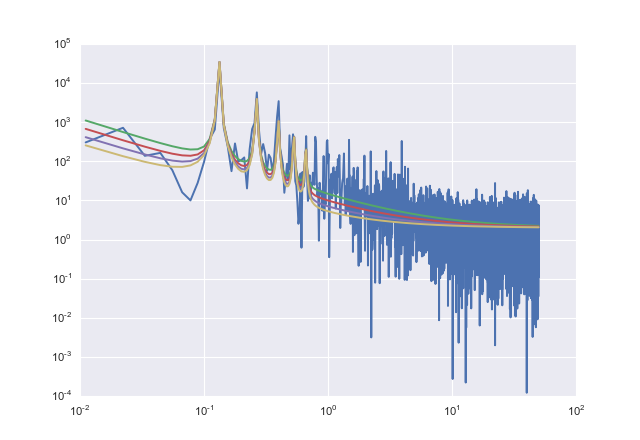

In [381]:
plt.figure()
plt.loglog(ps1.freq, ps1.power)
plt.loglog(ps1.freq, mm[0])
plt.loglog(ps1.freq, mm[1])
plt.loglog(ps1.freq, mm[2])
plt.loglog(ps1.freq, mm[3])



That looks like a pretty good model! Now all we have to do is define likelihood and posterior, and we can sample:

In [382]:

class PSDPosterior(object):
    
    def __init__(self, ps_all, energies, kk=5):
        
        # list of all power spectra objects
        self.ps_all = ps_all
        
        # associated energy bins
        self.energies = energies
        
        # the number of Lorentzians to be fit
        self.kk = kk
        
        # number of spectra
        self.nn = self.energies.shape[0]
        
        return
    
    def logprior(self, t0):
        return logprior(t0)
    
    def loglikelihood(self, t0, neg=False):
        """
        The log-likelihood for the model defined in self.model
        and the parameters in t0. Uses a $\Chi^2$ model for
        the uncertainty.

        Parameters:
        ------------
        t0: {list | numpy.ndarray}
            The list with parameters for the model

        Returns:
        --------
        logl: float
            The logarithm of the likelihood function for the model and
            parameters given.

        """

        # all mean models
        funcval_all = mean_model(self.ps_all[0].freq, self.energies, self.kk, t0)

        # initialize log-likelihood
        res = 0.0

        # run through all spectra and add log-likelihoods
        for i, (f, ps) in enumerate(zip(funcval_all, self.ps_all)):
            y = ps.power
            res += -np.sum(np.log(f)) - np.sum(y/f)


        if not np.isfinite(res):
            res = logmin

        if neg:
            return -res
        else:
            return res
    
    def logposterior(self, t0, neg=False):
        lpost = self.loglikelihood(t0) + self.logprior(t0)
        if neg is True:
            return -lpost
        else:
            return lpost

    def __call__(self, t0, neg=False):
        return self.logposterior(t0, neg=neg)



In [383]:
ps_all = [ps1, ps2, ps3, ps4]

In [384]:
lpost = PSDPosterior(ps_all, energies, 5)

In [385]:
lpost(theta_test)

-38757.546798738913

This seems to work! Optimization time:

In [386]:
import scipy.optimize
opt = scipy.optimize.minimize(lpost, theta_test,
                              method="BFGS",
                              args=(True), tol=1.e-10)


In [392]:
opt.x[1]

-0.0052373684460991048

In [387]:
mm = mean_model(ps1.freq, energies, 5, opt.x)

<IPython.core.display.Javascript object>


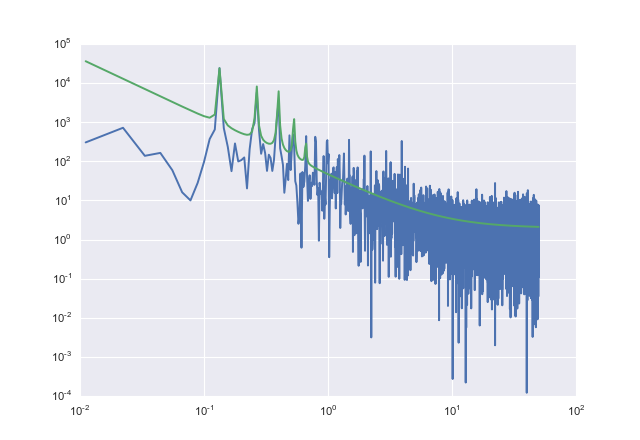

<IPython.core.display.Javascript object>


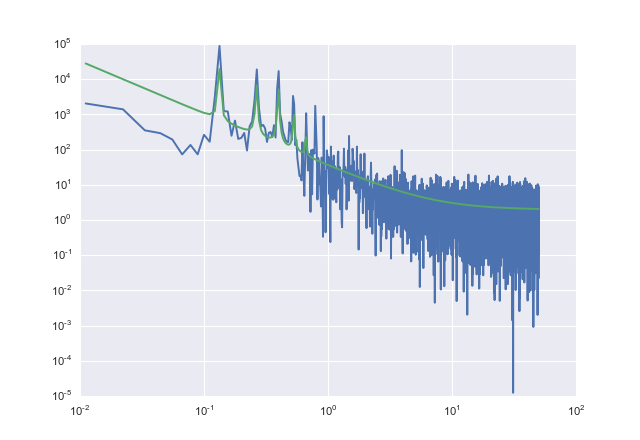

<IPython.core.display.Javascript object>


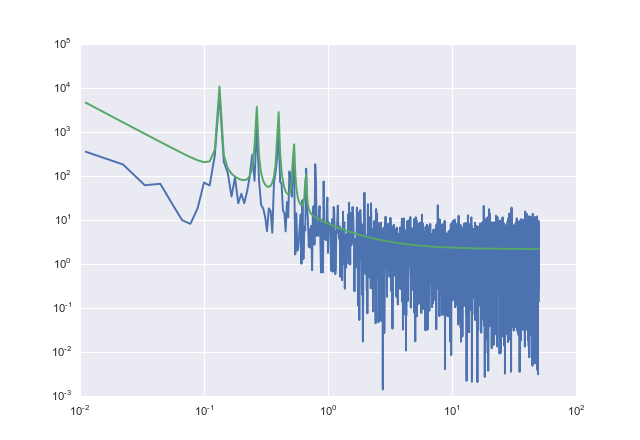

<IPython.core.display.Javascript object>


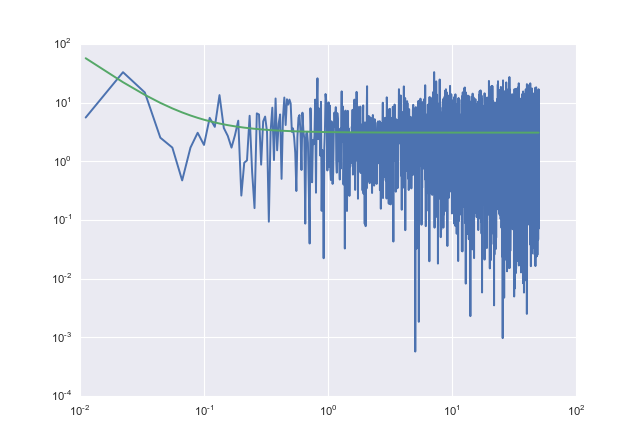

In [388]:
for (ps, m) in zip(ps_all, mm):
    plt.figure()
    plt.loglog(ps.freq, ps.power)
    plt.loglog(ps.freq, m)

MCMC time:

In [373]:
p = [  2.77840709e+00,  -1.04065417e-02,   1.36854852e+00,   3.46734415e+00,
   2.46445708e+00,   1.96736571e+00,   9.58870672e-02,   1.44576548e+00,
   4.09433155e+00,  -5.63809239e-01,   2.39743360e+00,   3.98256052e+01,
   3.81974123e+01,   3.97290383e+01,   3.93155947e+01,   3.99005489e+01,
  -7.00985744e+00,  -6.42035175e+00,  -6.66531400e+00,  -5.89766491e+00,
  -4.27986495e+00]

In [375]:
lpost(p)

-20000000000000.0

In [ ]:
import emcee

ndim = len(theta_test)
nwalkers = 1000
burnin = 200
niter = 500

# sample random starting positions for each walker from
# a multivariate Gaussian
p0 = np.array([np.random.multivariate_normal(opt.x, opt.hess_inv) for
               i in range(nwalkers)])

# initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, lpost, args=[False],
                                threads=4)

# run the burn-in
pos, prob, state = sampler.run_mcmc(p0, burnin)

sampler.reset()

# do the actual MCMC run
_, _, _ = sampler.run_mcmc(pos, niter, rstate0=state)

